In [1]:
import gzip
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

## Извлечение исходных данных из архивов

In [2]:
project_path =  Path.cwd().parent
data_path = project_path / "data"
raw_path = data_path / "raw"
preproc_path = data_path / "preprocessed"

files = [
"train-images-idx3-ubyte",
"train-labels-idx1-ubyte",
"t10k-images-idx3-ubyte",
"t10k-labels-idx1-ubyte"
]

source_train_im_path = preproc_path / "train-images-idx3-ubyte.bin"
source_train_l_path = preproc_path / "train-labels-idx1-ubyte.bin"
source_test_im_path = preproc_path / "t10k-images-idx3-ubyte.bin"
source_test_l_path = preproc_path / "t10k-labels-idx1-ubyte.bin"


In [3]:
for base in files:
    with open(raw_path / (base + ".gz"), "rb") as f:
        decompressed = gzip.decompress(f.read())
    with open(preproc_path / (base + ".bin"), "wb") as f:
        f.write(decompressed)

## Считывание данных из бинарных файлов

### Обучающая выборка

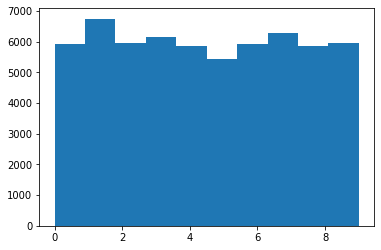

In [4]:
# Метки обуающей выборки
train_labels = np.fromfile(source_train_l_path, dtype=np.uint8, offset=8)
plt.hist(train_labels);

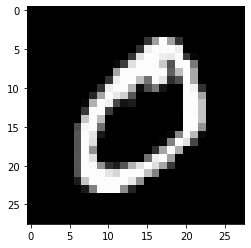

In [5]:
# Изображения обучающей выборки
train_size, rows, columns = 60000, 28, 28
train_images = np.fromfile(source_train_im_path, dtype=np.uint8, offset=16).reshape((train_size, rows, columns))
plt.imshow(train_images[1,:,:], cmap='gray')

### Тестовая выборка

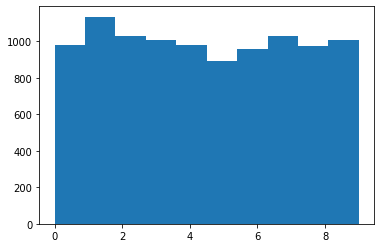

In [6]:
# Метки тестовой выборки
test_labels = np.fromfile(source_test_l_path, dtype=np.uint8, offset=8)
plt.hist(test_labels);

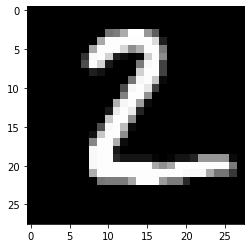

In [7]:
# Изображения тестовой выборки
test_size, rows, columns = 10000, 28, 28
test_images = np.fromfile(source_test_im_path, dtype=np.uint8, offset=16).reshape((test_size, rows, columns))
plt.imshow(test_images[1,:,:], cmap='gray')

In [8]:
import sys
sys.path.append('../')

In [9]:
from core.models import MNISTDense
from core.initializers import He, Xavier
from core.optimizers import GradDesc
from core.layers import Dense
from core.losses import Crossentropy
from core.activations import ReLu, Softmax

In [10]:
n_train = 1000
n_classes = 10
prepared_labels = train_labels[:n_train]
prepared_images = train_images[:n_train].reshape(n_train, -1)
prepared_images = (prepared_images > 0).astype(np.uint8)

In [11]:
model = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, He],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=GradDesc(0.000001),
    loss=Crossentropy
)

In [12]:
history = model.fit(2, 32, prepared_images, prepared_labels)

AttributeError: 'MNISTDense' object has no attribute 'layers_size'

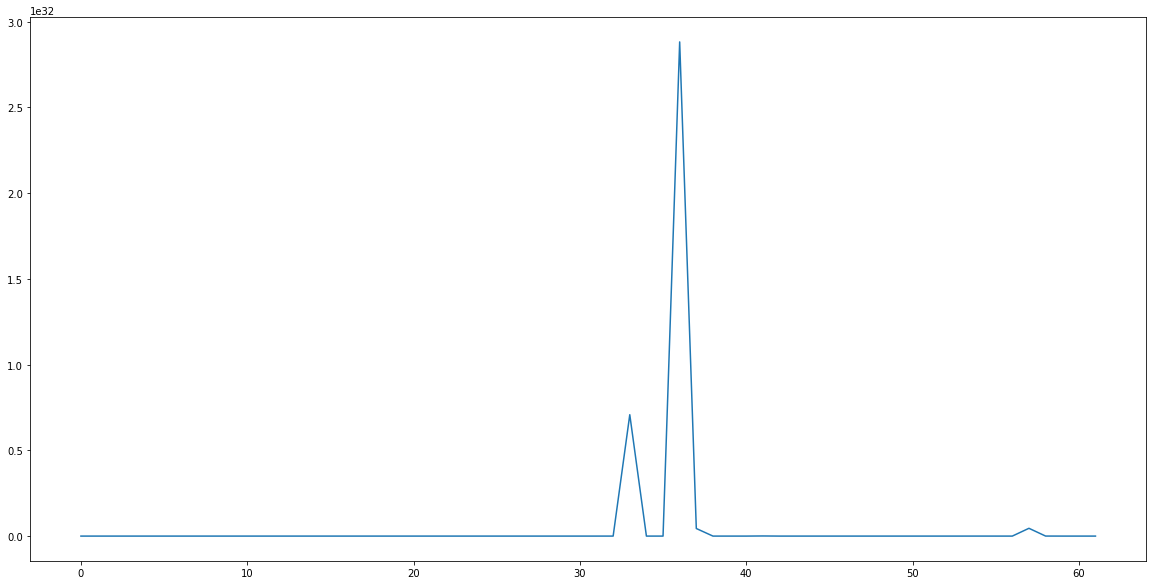

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history.flatten())

In [ ]:
a = np.ones((3,2,2))
b = np.ones((3,2,1))

In [ ]:
c = np.arange(12).reshape((3,2,2))
display(c)
d = np.array(('a', 'b', 'c', 'd', 'e', 'f'), dtype=object).reshape(3, 1, 2)
d

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

array([[['a', 'b']],

       [['c', 'd']],

       [['e', 'f']]], dtype=object)

In [ ]:
np.expand_dims((c * d).sum(axis=2), 2)


array([[['b'],
        ['aabbb']],

       [['ccccddddd'],
        ['ccccccddddddd']],

       [['eeeeeeeefffffffff'],
        ['eeeeeeeeeefffffffffff']]], dtype=object)

In [ ]:
awaited = np.array(('b', 'aabbb', 'ccccddddd', 'ccccccddddddd', 'eeeeeeeefffffffff', 'eeeeeeeeeefffffffffff'), dtype=object).reshape(3,2,1)
awaited

array([[['b'],
        ['aabbb']],

       [['ccccddddd'],
        ['ccccccddddddd']],

       [['eeeeeeeefffffffff'],
        ['eeeeeeeeeefffffffffff']]], dtype=object)

In [ ]:
a = np.arange(6).reshape((3,2,1))
display(a)
b = np.arange(6).reshape((3,1,2))
b

array([[[0],
        [1]],

       [[2],
        [3]],

       [[4],
        [5]]])

array([[[0, 1]],

       [[2, 3]],

       [[4, 5]]])

In [ ]:
a*b

array([[[ 0,  0],
        [ 0,  1]],

       [[ 4,  6],
        [ 6,  9]],

       [[16, 20],
        [20, 25]]])